Perform k=5 nearest neighbour classification on different neuron representations AND density maps

In [1]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

## plotting ###

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
def get_confusion_matrix(predicted_labels, true_labels):
    
    n_classes = len(np.unique(true_labels))
    
    confusion = np.zeros((n_classes, n_classes))
    for k, c in enumerate(np.unique(true_labels)):
        
        label_index = true_labels == c
        
        classes, counts = np.unique(predicted_labels[label_index], return_counts=True)
        confusion[k, classes] = counts
    return confusion

def tp(a, ix):
    return a[ix,ix]

def tn(a, ix):
    c, c = a.shape
    indices = list(range(c))
    indices.pop(ix)
    indices = np.array(indices)
    b = a[:,indices][indices]
    return b.sum()

def fn(a, ix):
    c, c = a.shape
    indices = list(range(c))
    indices.pop(ix)
    indices = np.array(indices)
    
    return a[ix,indices].sum()

def fp(a, ix):
    c, c = a.shape
    indices = list(range(c))
    indices.pop(ix)
    indices = np.array(indices)
    return a[:,ix][indices].sum()

In [3]:
with open('./data/toy_data/3_populations/latent/k500/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)
    
with open('./data/toy_data/3_populations/latent/k500/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)

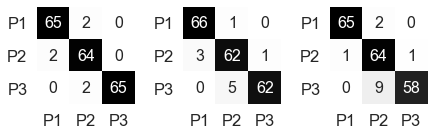

In [4]:
sns.set(font_scale=1.5)

fig, axes = plt.subplots(1,3,figsize=(7,2))
Cs = []
for k, frac in enumerate([.9,.5,.1]):
    
    confusion_matrices = []
    for run in range(1,4):
        with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

        with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)
        
#         print('On run %i of model frac %.1f:'%(run,frac))
#         print('Training score: ', k_nn.score(train_data, train_labels))
#         print('Test score: ',  k_nn.score(test_data, test_labels))
       
        predicted_labels = k_nn.predict(test_data)
        confusion = get_confusion_matrix(predicted_labels, test_labels)
        confusion_matrices.append(np.expand_dims(confusion, -1))
    confusion_matrices = np.concatenate(confusion_matrices, axis=-1)
    avg_conf = confusion_matrices.sum(axis=-1)
    avg_conf /= avg_conf.sum(axis=1).reshape(-1,1)
    avg_conf = (avg_conf*100).round()
    Cs.append(confusion_matrices)
    annotation = confusion_matrices.mean(axis=2).round(1)
    sns.heatmap(avg_conf, cmap='Greys', annot=annotation, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['P1', 'P2', 'P3'], square=True,
           yticklabels=['P1', 'P2', 'P3'], ax=axes[k])
    axes[k].set_yticklabels(['P1', 'P2', 'P3'], rotation=0)
fig.subplots_adjust( wspace=.5)
plt.savefig('./pics/ICML/resubmission/Fig4/confusion_matrices_toy_data.svg', format='svg')

In [5]:
Cs = np.array(Cs)
Cs_ = Cs / np.sum(Cs, axis=2)
Cs_.mean(axis=3).mean(axis=0).round(2)

array([[0.98, 0.02, 0.  ],
       [0.03, 0.96, 0.01],
       [0.  , 0.08, 0.92]])

In [6]:
Cs_.mean(axis=3).std(axis=0).round(3)

array([[0.002, 0.002, 0.   ],
       [0.008, 0.012, 0.006],
       [0.   , 0.043, 0.043]])

In [7]:
Cs_.mean(axis=3).round(2)

array([[[0.98, 0.03, 0.  ],
        [0.03, 0.97, 0.  ],
        [0.  , 0.03, 0.98]],

       [[0.98, 0.02, 0.  ],
        [0.04, 0.94, 0.01],
        [0.  , 0.08, 0.93]],

       [[0.98, 0.03, 0.  ],
        [0.02, 0.97, 0.01],
        [0.  , 0.13, 0.87]]])

In [8]:
Cs_.std(axis=3).round(3)

array([[[0.014, 0.014, 0.   ],
        [0.   , 0.   , 0.   ],
        [0.   , 0.007, 0.007]],

       [[0.007, 0.007, 0.   ],
        [0.007, 0.019, 0.012],
        [0.   , 0.021, 0.021]],

       [[0.007, 0.007, 0.   ],
        [0.007, 0.012, 0.014],
        [0.   , 0.05 , 0.049]]])

In [9]:
# Fully unsupervised
confusion_matrices = list()
for run in range(1,4):
    with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_train'%(0.0, run), 'rb') as f:
        train_data = np.load(f)

    with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_test'%(0.0, run), 'rb') as f:
        test_data = np.load(f)

        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)


        predicted_labels = k_nn.predict(test_data)
        confusion = get_confusion_matrix(predicted_labels, test_labels)
        confusion_matrices.append(np.expand_dims(confusion, -1))
confusion_matrices = np.concatenate(confusion_matrices, axis=-1)
avg_conf = confusion_matrices.sum(axis=-1)
avg_conf /= avg_conf.sum(axis=1).reshape(-1,1)

In [10]:
from copy import copy

In [11]:
C_ = copy(confusion_matrices)

In [12]:
C_ /= C_.sum(axis=1)
print(C_.mean(axis=-1))
print(C_.std(axis=-1))

[[0.96517413 0.03535354 0.        ]
 [0.00497512 0.99494949 0.        ]
 [0.         0.14646465 0.85572139]]
[[0.00703589 0.00714249 0.        ]
 [0.00703589 0.00714249 0.        ]
 [0.         0.00714249 0.00703589]]


In [13]:
avg_conf

array([[0.96517413, 0.03482587, 0.        ],
       [0.00505051, 0.99494949, 0.        ],
       [0.        , 0.14427861, 0.85572139]])

In [14]:
## load in max pooled on original walks
with open('./data/toy_data/3_populations/max-pooled/max_pooled_train.npy', 'rb') as f:
    train_data_max_pooled = np.load(f)
    
with open('./data/toy_data/3_populations/max-pooled/train_labels.npy', 'rb') as f:
    train_labels_max_pooled = np.load(f)

with open('./data/toy_data/3_populations/max-pooled/max_pooled_test.npy', 'rb') as f:
    test_data_max_pooled = np.load(f)
    
with open('./data/toy_data/3_populations/max-pooled/test_labels.npy', 'rb') as f:
    test_labels_max_pooled = np.load(f)

In [15]:
k_nn.fit(train_data_max_pooled, train_labels_max_pooled)
predicted_labels_max_pooled = k_nn.predict(test_data_max_pooled)

confusion = get_confusion_matrix(predicted_labels_max_pooled, test_labels_max_pooled)
avg_conf = (confusion / confusion.sum(axis=1).reshape(-1,1))*100


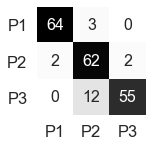

In [16]:
fig = plt.figure(figsize=(2,2))
sns.heatmap(avg_conf.round(), cmap='Greys', annot=confusion, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['P1', 'P2', 'P3'],
           yticklabels=['P1', 'P2', 'P3'], square=True)
plt.gca().set_yticklabels(['P1', 'P2', 'P3'], rotation=0)

plt.savefig('./pics/ICML/resubmission/Fig4/confusion_matrices_toy_data_max_pooled.svg', format='svg')

In [17]:
### load in density maps

with open('./data/toy_data/3_populations/density_map/xy_dm_10pcs_train.npy', 'rb') as f:
    train_data_dm = np.load(f)

with open('./data/toy_data/3_populations/density_map/xy_dm_10pcs_test.npy', 'rb') as f:
    test_data_dm = np.load(f)
    
np.random.seed(17)
N = 1200
N_train = 750
N_val = 250 
N_test = N - N_train - N_val
train_index = np.random.choice(range(N), size=N_train, replace=False)
val_index = np.random.choice(list(set(range(N)) - set(train_index)), size=N_val, replace=False)
test_index = np.array(list(set(range(N)) - set(train_index) -set(val_index)))

In [18]:
train_labels_dm = np.zeros(train_index.shape).astype(int)
train_labels_dm[train_index >=400] = 1
train_labels_dm[train_index >=800] = 2

test_labels_dm = np.zeros(test_index.shape).astype(int)
test_labels_dm[test_index >=400] = 1
test_labels_dm[test_index >=800] = 2

In [19]:
k_nn.fit(train_data_dm, train_labels_dm)
predicted_labels_dm = k_nn.predict(test_data_dm)

confusion = get_confusion_matrix(predicted_labels_dm, test_labels_dm)
avg_conf = (confusion / confusion.sum(axis=1).reshape(-1,1))*100


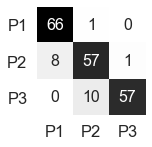

In [20]:
fig = plt.figure(figsize=(2,2))
sns.heatmap(avg_conf.round(), cmap='Greys', annot=confusion, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['P1', 'P2', 'P3'],
           yticklabels=['P1', 'P2', 'P3'], square=True)
plt.gca().set_yticklabels(['P1', 'P2', 'P3'], rotation=0)

plt.savefig('./pics/ICML/resubmission/Fig4/confusion_matrices_toy_data_dm.svg', format='svg')

## Real data

In [28]:
with open('./data/M1_exc_data/latent/k500/rna_labels/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)

with open('./data/M1_exc_data/latent/k500/rna_labels/labels/val_labels.npy', 'rb') as f:
    val_labels = np.load(f)
    
with open('./data/M1_exc_data/latent/k500/rna_labels/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)

On run 1 of model frac 0.9:
Training score:  0.85
Test score:  0.7307692307692307
On run 2 of model frac 0.9:
Training score:  0.85
Test score:  0.8076923076923077
On run 3 of model frac 0.9:
Training score:  0.88125
Test score:  0.8269230769230769
On run 1 of model frac 0.5:
Training score:  0.84375
Test score:  0.7307692307692307
On run 2 of model frac 0.5:
Training score:  0.875
Test score:  0.7884615384615384
On run 3 of model frac 0.5:
Training score:  0.8625
Test score:  0.7692307692307693
On run 1 of model frac 0.1:
Training score:  0.85
Test score:  0.7692307692307693
On run 2 of model frac 0.1:
Training score:  0.84375
Test score:  0.7692307692307693
On run 3 of model frac 0.1:
Training score:  0.8625
Test score:  0.7692307692307693


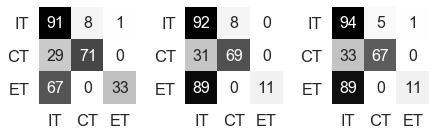

In [24]:
sns.set(font_scale=1.5)

fig, axes = plt.subplots(1,3,figsize=(7,2))
for k, frac in enumerate([.9,.5,.1]):
    
    confusion_matrices = []
    for run in range(1,4):
        with open('./data/M1_exc_data/latent/k500/rna_labels/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

#         with open('./data/M1_data/latent/k500/neuron_latent_representation_frac_%.1f_run%i_val'%(frac, run), 'rb') as f:
#             val_data = np.load(f)
            
        with open('./data/M1_exc_data/latent/k500/rna_labels/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)
        
        print('On run %i of model frac %.1f:'%(run,frac))
        print('Training score: ', k_nn.score(train_data, train_labels))
#         print('Val score: ',  k_nn.score(val_data, val_labels))
        print('Test score: ',  k_nn.score(test_data, test_labels))
       
        predicted_labels = k_nn.predict(test_data)
        confusion = get_confusion_matrix(predicted_labels, test_labels)
        confusion_matrices.append(np.expand_dims(confusion, -1))
    confusion_matrices = np.concatenate(confusion_matrices, axis=-1)
    avg_conf = confusion_matrices.sum(axis=-1)
    avg_conf/=avg_conf.sum(axis=1).reshape(-1,1)
    
    sns.heatmap((avg_conf*100).round(), cmap='Greys', annot=True, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['IT', 'CT', 'ET'], square=True,
           yticklabels=['IT', 'CT', 'ET'], ax=axes[k])
    axes[k].set_yticklabels(['IT', 'CT', 'ET'], rotation=0)
fig.subplots_adjust( wspace=.5)
# plt.savefig('./pics/ICML/v3/Fig6/confusion_matrices_pyr_data.svg', format='svg')

In [26]:
### load in density maps

with open('./data/M1_exc_data/density_map/xz_dm_5pcs_train_c3.npy', 'rb') as f:
    train_data_dm = np.load(f)

with open('./data/M1_exc_data/density_map/xz_dm_5pcs_test_c3.npy', 'rb') as f:
    test_data_dm = np.load(f)

In [27]:
k_nn.fit(train_data_dm, train_labels)
predicted_labels_dm = k_nn.predict(test_data_dm)

confusion = get_confusion_matrix(predicted_labels_dm, test_labels)
confusion /= confusion.sum(axis=1).reshape(-1,1)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 52

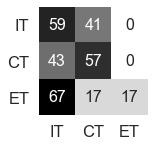

In [30]:
fig = plt.figure(figsize=(2,2))
sns.heatmap((confusion*100).round(), cmap='Greys', annot=True, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['IT', 'CT', 'ET'],
           yticklabels=['IT', 'CT', 'ET'], square=True)
plt.gca().set_yticklabels(['IT', 'CT', 'ET'], rotation=0)

# plt.savefig('./pics/ICML/v3/Fig6/confusion_matrices_pyr_data_dm.svg', format='svg')

# based on m type labels

In [30]:
with open('./data/M1_exc_data/latent/m_labels/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)

with open('./data/M1_exc_data/latent/m_labels/labels/val_labels.npy', 'rb') as f:
    val_labels = np.load(f)
    
with open('./data/M1_exc_data/latent/m_labels/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)

On run 1 of model frac 1.0:
Training score:  0.8875
Test score:  0.7666666666666667
On run 2 of model frac 1.0:
Training score:  0.86875
Test score:  0.7166666666666667
On run 3 of model frac 1.0:
Training score:  0.83125
Test score:  0.7166666666666667
On run 1 of model frac 0.0:
Training score:  0.75
Test score:  0.6666666666666666
On run 2 of model frac 0.0:
Training score:  0.75
Test score:  0.65
On run 3 of model frac 0.0:
Training score:  0.75
Test score:  0.6333333333333333


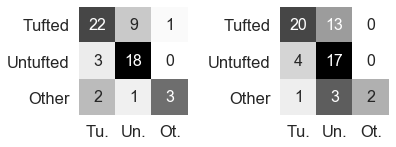

In [31]:
sns.set(font_scale=1.5)
Cs = []
fig, axes = plt.subplots(1,2,figsize=(6,2))
for k, frac in enumerate([1., .0]): #[.9,.1]):
    
    confusion_matrices = []
    for run in range(1,4):
        with open('./data/M1_exc_data/latent/m_labels/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

          
        with open('./data/M1_exc_data/latent/m_labels/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)
        
        print('On run %i of model frac %.1f:'%(run,frac))
        print('Training score: ', k_nn.score(train_data, train_labels))
        print('Test score: ',  k_nn.score(test_data, test_labels))
       
        predicted_labels = k_nn.predict(test_data)
        confusion = get_confusion_matrix(predicted_labels, test_labels)
        confusion_matrices.append(np.expand_dims(confusion, -1))
    confusion_matrices = np.concatenate(confusion_matrices, axis=-1)
    avg_conf = confusion_matrices.sum(axis=-1)
    avg_conf/=avg_conf.sum(axis=1).reshape(-1,1)
    avg_conf *=100
    Cs.append(confusion_matrices)
    annotation = confusion_matrices.mean(axis=2).round(1)
    sns.heatmap(avg_conf.round(), cmap='Greys', annot=annotation, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['Tu.', 'Un.', 'Ot.'], square=True,
           yticklabels=['Tufted', 'Untufted', 'Other'], ax=axes[k])
    axes[k].set_yticklabels(['Tufted', 'Untufted', 'Other'], rotation=0)
fig.subplots_adjust( wspace=.5)
# plt.savefig('./pics/ICML/v5/Fig7/confusion_matrices_pyr_data_mtype_labels.svg', format='svg')

In [41]:
# confusion matrix for m- labels

### load in density maps

with open('./data/M1_exc_data/density_map/individual/xz_dm_7pcs_train_c3.npy', 'rb') as f:
    train_data_dm = np.load(f)

with open('./data/M1_exc_data/density_map/individual/xz_dm_7pcs_test_c3.npy', 'rb') as f:
    test_data_dm = np.load(f)
    
with open('./data/M1_exc_data/density_map/labels/m_train_labels.npy', 'rb') as f:
    train_labels = np.load(f,allow_pickle=True)
    
with open('./data/M1_exc_data/density_map/labels/m_test_labels.npy', 'rb') as f:
    test_labels = np.load(f,allow_pickle=True)

In [42]:
train_data_dm.shape

(160, 7)

In [43]:
k_nn = KNeighborsClassifier(n_neighbors=5)
k_nn.fit(train_data_dm, train_labels)
predicted_labels_dm = k_nn.predict(test_data_dm)

confusion = get_confusion_matrix(predicted_labels_dm, test_labels)
avg_conf = (confusion / confusion.sum(axis=1).reshape(-1,1))*100

In [44]:
confusion

array([[16., 14.,  3.],
       [ 3., 14.,  4.],
       [ 1.,  2.,  3.]])

[Text(0, 0.5, 'Tufted'), Text(0, 1.5, 'Untufted'), Text(0, 2.5, 'Other')]

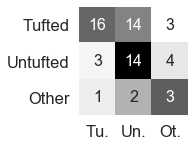

In [45]:
fig = plt.figure(figsize=(2,2))
sns.heatmap(avg_conf.round(), cmap='Greys', annot=confusion, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['Tu.', 'Un.', 'Ot.'],
           yticklabels=['Tufted', 'Untufted', 'Other'], square=True)
plt.gca().set_yticklabels(['Tufted', 'Untufted', 'Other'], rotation=0)


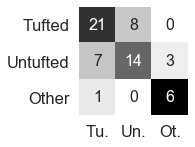

In [33]:
fig = plt.figure(figsize=(2,2))
sns.heatmap(avg_conf.round(), cmap='Greys', annot=confusion, cbar=False, fmt='.0f', annot_kws=dict(size=16),
            xticklabels=['Tu.', 'Un.', 'Ot.'],
           yticklabels=['Tufted', 'Untufted', 'Other'], square=True)
plt.gca().set_yticklabels(['Tufted', 'Untufted', 'Other'], rotation=0)

plt.savefig('./pics/ICML/v5/Fig7/confusion_matrices_pyr_data_dm_mtype_labels.svg', format='svg')

# Build a dataframe with the classification data
## toy data

In [3]:
import pandas as pd

In [4]:
with open('./data/toy_data/3_populations/latent/k500/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)
    
with open('./data/toy_data/3_populations/latent/k500/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)

In [5]:
df = pd.DataFrame()
population_dict={0:'P1', 1:'P2', 2:'P3'}
for k, frac in enumerate([1.,.9,.5,.1,.0]):
    
    for run in range(1,4):
        with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

        with open('./data/toy_data/3_populations/latent/k500/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)
        
        predicted_labels = k_nn.predict(test_data)
        conf = get_confusion_matrix(predicted_labels, test_labels)
        
        for l in np.unique(train_labels):
            
            acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))
            
            d = dict(Representation='r_T', Param=frac, Ds='Toy', Accuracy=acc, 
                     Population=population_dict[l], Run=run)
            df = df.append(d, ignore_index=True)

### add density maps

In [6]:
import os
path ='./data/toy_data/3_populations/density_map/'
# root, _ , files = list(os.walk(path))[0]

dm_files = ['xy_dm_105pcs',
            'xy_dm_26pcs',
            'xy_dm_10pcs']



In [7]:
with open('./data/toy_data/3_populations/density_map/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f).astype(int)
with open('./data/toy_data/3_populations/density_map/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f).astype(int)

In [8]:
for k, filename in enumerate(dm_files):
    with open(path + filename + '_train_c%i.npy'%(k+1), 'rb') as f:
        train_data = np.load(f)

    with open(path + filename + '_test_c%i.npy'%(k+1), 'rb') as f:
        test_data = np.load(f)

    k_nn = KNeighborsClassifier(n_neighbors=5)
    k_nn.fit(train_data, train_labels)

    predicted_labels = k_nn.predict(test_data)
    conf = get_confusion_matrix(predicted_labels, test_labels)

    if k == 0 :
        sigma = .5
    elif k == 1:
        sigma = 1
    elif k == 2:
        sigma = 2
    
    for l in np.unique(train_labels):

        acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))

        d = dict(Representation='DM', Param=sigma, Ds='Toy', Accuracy=acc, 
                 Population=population_dict[l])
        df = df.append(d, ignore_index=True)

# EXC data

### latent representation

In [9]:
path = './data/M1_exc_data/latent/m_labels/'
with open(path + 'labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)
    
with open(path + '/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)

In [10]:
population_dict={0:'Tufted', 1:'Untufted', 2:'Other'}
for k, frac in enumerate([1.,.9,.5,.1,.0]):
    
    for run in range(1,4):
        with open(path +'neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

        with open(path + '/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data, train_labels)
        
        predicted_labels = k_nn.predict(test_data)
        conf = get_confusion_matrix(predicted_labels, test_labels)
        
        for l in np.unique(train_labels):
            
            acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))
            
            d = dict(Representation='r_T', Param=frac, Ds='M1 EXC', Accuracy=acc, 
                     Population=population_dict[l], Run=run)
            df = df.append(d, ignore_index=True)

### Density maps

In [11]:
path_dm ='./data/M1_exc_data/density_map/'
# normalization = 'individual'
# dm_files = ['xz_dm_64pcs', 'xz_dm_22pcs', 'xz_dm_7pcs']

normalization = 'global' 
dm_files = ['xz_dm_40pcs', 'xz_dm_15pcs', 'xz_dm_5pcs']

root, _ , files = list(os.walk(path_dm + normalization))[0]



In [12]:
with open(path_dm + '/labels/m_train_labels.npy', 'rb') as f:
    train_labels = np.load(f).astype(int)
with open(path_dm + 'labels/m_test_labels.npy', 'rb') as f:
    test_labels = np.load(f).astype(int)
    
for k, filename in enumerate(dm_files):
    with open(path_dm + '%s/'%normalization + filename + '_train_c%i.npy'%(k+1), 'rb') as f:
        train_data = np.load(f)

    with open(path_dm + '%s/'%normalization + filename + '_test_c%i.npy'%(k+1), 'rb') as f:
        test_data = np.load(f)

    k_nn = KNeighborsClassifier(n_neighbors=5)
    k_nn.fit(train_data, train_labels)

    predicted_labels = k_nn.predict(test_data)
    conf = get_confusion_matrix(predicted_labels, test_labels)

    if k == 0 :
        sigma = .5
    elif k == 1:
        sigma = 1
    elif k == 2:
        sigma = 2
    
    for l in np.unique(train_labels):

        acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))

        d = dict(Representation='DM', Param=sigma, Ds='M1 EXC', Accuracy=acc, 
                 Population=population_dict[l])
        df = df.append(d, ignore_index=True)

# INH data axon

### latent representation

In [40]:
path = './data/M1_inh_data/latent/'
part = 'axon'
with open(path + 'labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)
    
with open(path + '/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)
    
label_index_train = train_labels != -100
label_index_test = test_labels != -100

In [14]:
population_dict={0:'Sst', 1:'Pvalb', 2:'Vip', 3:'Lamp5'}
for k, frac in enumerate([1.,.9,.5,.1,.0]):
    
    for run in range(1,4):
        with open(path + part +'/finetuned/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

        with open(path + part+ '/finetuned/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)

        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data[label_index_train], train_labels[label_index_train])
        
        predicted_labels = k_nn.predict(test_data[label_index_test])
        conf = get_confusion_matrix(predicted_labels, test_labels[label_index_test])
        
        for l in np.unique(train_labels[label_index_train]):
            
            acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))
            
            d = dict(Representation='r_T', Param=frac, Ds='M1 INH', Accuracy=acc, 
                     Population=population_dict[l], Run=run)
            df = df.append(d, ignore_index=True)

### density maps

In [15]:
path_dm ='./data/M1_inh_data/density_map/axon/'
# normalization = 'individual'
# dm_files = ['xz_dm_50pcs', 'xz_dm_13pcs', 'xz_dm_6pcs']

normalization = 'global' 
dm_files = ['xz_dm_28pcs', 'xz_dm_9pcs', 'xz_dm_4pcs']

root, _ , files = list(os.walk(path_dm + normalization))[0]


In [16]:
with open(path_dm + '/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f).astype(int)
with open(path_dm + 'labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f).astype(int)

label_index_train = train_labels != -100
label_index_test = test_labels != -100

for k, filename in enumerate(dm_files):
    with open(path_dm + '%s/'%normalization + filename + '_train_c%i.npy'%(k+1), 'rb') as f:
        train_data = np.load(f)

    with open(path_dm + '%s/'%normalization + filename + '_test_c%i.npy'%(k+1), 'rb') as f:
        test_data = np.load(f)

    k_nn = KNeighborsClassifier(n_neighbors=5)
    k_nn.fit(train_data[label_index_train], train_labels[label_index_train])
        
    predicted_labels = k_nn.predict(test_data[label_index_test])
    conf = get_confusion_matrix(predicted_labels, test_labels[label_index_test])

    if k == 0 :
        sigma = .5
    elif k == 1:
        sigma = 1
    elif k == 2:
        sigma = 2
    
    for l in np.unique(train_labels[label_index_train]):

        acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))

        d = dict(Representation='DM', Param=sigma, Ds='M1 INH', Accuracy=acc, 
                 Population=population_dict[l])
        df = df.append(d, ignore_index=True)

# Farrow data - soma centered

### latent representation

In [17]:
path = './data/Farrow_data/latent/soma_centered/'
part = 'finetuned'
with open(path + '/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f)
    
with open(path + '/labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f)
    
label_index_train = train_labels != -100
label_index_test = test_labels != -100

In [18]:
population_dict = {-100:'no label', 13: '8n/9n', 12: 'sONα', 11: 'F-midi ON', 
              10: 'tONα', 9:'6sn', 8:'F-mini ON', 7:'HD1/HD2', 
              6:'5to', 5:'tOFFα', 4: 'mini tOFFα', 3: 'ON-OFF DS',
             2: '27', 1:'F-mini-OFF', 0: 'sOFFα'}

In [19]:
for k, frac in enumerate([1.,.9, .5, .0]):
    
    for run in range(1,4):
        with open(path + part+ '/neuron_latent_representation_frac_%.1f_run%i_train'%(frac, run), 'rb') as f:
            train_data = np.load(f)

        with open(path + part + '/neuron_latent_representation_frac_%.1f_run%i_test'%(frac, run), 'rb') as f:
            test_data = np.load(f)
        
        k_nn = KNeighborsClassifier(n_neighbors=5)
        k_nn.fit(train_data[label_index_train], train_labels[label_index_train])
        
        predicted_labels = k_nn.predict(test_data[label_index_test])
        conf = get_confusion_matrix(predicted_labels, test_labels[label_index_test])
        
        for l in np.unique(train_labels[label_index_train]):
            
            acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))
            
            d = dict(Representation='r_T', Param=frac, Ds='RGC', Accuracy=acc, 
                     Population=population_dict[l], Run=run)
            df = df.append(d, ignore_index=True)

### density maps

In [20]:
path_dm ='./data/Farrow_data/density_map/soma_centered/'

dm_files = ['z_dm_6pcs', 'z_dm_4pcs', 'z_dm_3pcs']

root, _ , files = list(os.walk(path_dm))[0]

In [21]:
with open(path_dm + '/labels/train_labels.npy', 'rb') as f:
    train_labels = np.load(f).astype(int)
with open(path_dm + 'labels/test_labels.npy', 'rb') as f:
    test_labels = np.load(f).astype(int)

label_index_train = train_labels != -100
label_index_test = test_labels != -100

for k, filename in enumerate(dm_files):
    with open(path_dm + filename + '_train_c%i.npy'%(k+1), 'rb') as f:
        train_data = np.load(f)

    with open(path_dm + filename + '_test_c%i.npy'%(k+1), 'rb') as f:
        test_data = np.load(f)

    k_nn = KNeighborsClassifier(n_neighbors=5)
    k_nn.fit(train_data[label_index_train], train_labels[label_index_train])
        
    predicted_labels = k_nn.predict(test_data[label_index_test])
    conf = get_confusion_matrix(predicted_labels, test_labels[label_index_test])

    if k == 0 :
        sigma = .5
    elif k == 1:
        sigma = 1
    elif k == 2:
        sigma = 2
    
    for l in np.unique(train_labels[label_index_train]):

        acc=tp(conf,l)/(tp(conf,l)+fn(conf,l))

        d = dict(Representation='DM', Param=sigma, Ds='RGC', Accuracy=acc, 
                 Population=population_dict[l])
        df = df.append(d, ignore_index=True)

In [31]:
df[df['Ds'] == 'M1 EXC'].groupby(['Representation', 'Run', 'Param']).mean()

Accuracy
Representation Run Param          
r_T            1.0 0.0    0.598846
                   0.1    0.382395
                   0.5    0.416306
                   0.9    0.392496
                   1.0    0.750361
               2.0 0.0    0.571429
                   0.1    0.424242
                   0.5    0.392496
                   0.9    0.370851
                   1.0    0.680375
               3.0 0.0    0.572872
                   0.1    0.505772
                   0.5    0.400433
                   0.9    0.380952
                   1.0    0.674603

In [23]:
aggr = df.groupby(['Ds', 'Representation','Param']).mean().round(2)
aggr = aggr[['Accuracy']]
aggr

Accuracy
Ds     Representation Param          
M1 EXC DM             0.5        0.49
                      1.0        0.60
                      2.0        0.52
       r_T            0.0        0.58
                      0.1        0.44
                      0.5        0.40
                      0.9        0.38
                      1.0        0.70
M1 INH DM             0.5        0.56
                      1.0        0.66
                      2.0        0.61
       r_T            0.0        0.52
                      0.1        0.49
                      0.5        0.56
                      0.9        0.52
                      1.0        0.51
RGC    DM             0.5        0.51
                      1.0        0.53
                      2.0        0.39
       r_T            0.0        0.33
                      0.5        0.49
                      0.9        0.51
                      1.0        0.47
Toy    DM             0.5        0.86
                      1.0        0.90
                      2.0        0.90
       r_T            0.0        0.94
                      0.1        0.94
                      0.5        0.95
                      0.9        0.97
                      1.0        0.98

In [29]:
sem = df.groupby(['Ds', 'Representation','Param']).sem().round(2)
sem = sem[['Accuracy']]
sem

Accuracy
Ds     Representation Param          
M1 EXC DM             0.5        0.22
                      1.0        0.18
                      2.0        0.13
       r_T            0.0        0.07
                      0.1        0.10
                      0.5        0.08
                      0.9        0.10
                      1.0        0.05
M1 INH DM             0.5        0.09
                      1.0        0.10
                      2.0        0.15
       r_T            0.0        0.07
                      0.1        0.09
                      0.5        0.08
                      0.9        0.07
                      1.0        0.06
RGC    DM             0.5        0.10
                      1.0        0.10
                      2.0        0.11
       r_T            0.0        0.05
                      0.5        0.06
                      0.9        0.06
                      1.0        0.05
Toy    DM             0.5        0.07
                      1.0        0.06
                      2.0        0.04
       r_T            0.0        0.02
                      0.1        0.02
                      0.5        0.01
                      0.9        0.00
                      1.0        0.00

In [24]:
index = [   (   'Toy', 'r_T', 1.0),
            (   'Toy',  'DM', 2.0),
            ('M1 EXC', 'r_T', 1.0),        
            ('M1 EXC',  'DM', 1.0),   
            ('M1 INH', 'r_T', 0.5), 
            ('M1 INH',  'DM', 1.0),
            (   'RGC',  'r_T', 0.9), 
            (   'RGC',  'DM', 1.)
           ]

In [25]:
print(aggr.loc[index].to_latex())

\begin{tabular}{lllr}
\toprule
    &    &     &  Accuracy \\
Ds & Representation & Param &           \\
\midrule
Toy & r\_T & 1.0 &      0.98 \\
    & DM & 2.0 &      0.90 \\
M1 EXC & r\_T & 1.0 &      0.70 \\
    & DM & 1.0 &      0.60 \\
M1 INH & r\_T & 0.5 &      0.56 \\
    & DM & 1.0 &      0.66 \\
RGC & r\_T & 0.9 &      0.51 \\
    & DM & 1.0 &      0.53 \\
\bottomrule
\end{tabular}



In [28]:
err = df.groupby(['Ds', 'Representation','Param']).sem().round(2)
err = err[['Accuracy']]

print(err.loc[index].to_latex())

\begin{tabular}{lllr}
\toprule
    &    &     &  Accuracy \\
Ds & Representation & Param &           \\
\midrule
Toy & r\_T & 1.0 &      0.00 \\
    & DM & 2.0 &      0.04 \\
M1 EXC & r\_T & 1.0 &      0.05 \\
    & DM & 1.0 &      0.18 \\
M1 INH & r\_T & 0.5 &      0.08 \\
    & DM & 1.0 &      0.10 \\
RGC & r\_T & 0.9 &      0.06 \\
    & DM & 1.0 &      0.10 \\
\bottomrule
\end{tabular}

